# Statistics for AI


In [2]:
# Câu 1

import numpy as np


def compute_mean(x):
    return np.mean(x, axis=0)


x = [2, 0, 2, 2, 7, 4, -2, 5, -1, -1]
print(compute_mean(x))

1.8


In [3]:
# Câu 2:


def compute_median(x):
    return np.median(x)


x = [1, 5, 4, 4, 9, 13]
print(compute_median(x))

4.5


In [7]:
# Câu 3:


def compute_std(x):
    mean = compute_mean(x)
    variance = 0

    variance = np.sum((x - mean) ** 2 / len(x))
    return np.sqrt(variance)


x = [171, 176, 155, 167, 169, 182]
print(compute_std(x))

8.32666399786453


In [11]:
# Câu 4:


def compute_correlation_cofficient(x, y):
    N = len(x)
    numerator = N * (np.sum(x * y)) - (np.sum(x)) * (np.sum(y))
    denominator = np.sqrt(N * np.sum(x**2) - (np.sum(x) ** 2)) * np.sqrt(
        N * np.sum(y**2) - (np.sum(y) ** 2)
    )

    return np.round(numerator / denominator, 2)


X = np.asarray([-2, -5, -11, 6, 4, 15, 9])
Y = np.asarray([4, 25, 121, 36, 16, 225, 81])
print(" Correlation : ", compute_correlation_cofficient(X, Y))

 Correlation :  0.42


In [16]:
# Câu 5:

# Download dataset : ! gdown 1 iA0WmVfW88HyJvTBSQDI5vesf - pgKabq
import pandas as pd

data = pd.read_csv("advertising.csv")


def correlation(x, y):
    return compute_correlation_cofficient(x, y)


# Example usage :
x = data["TV"]
y = data["Radio"]
corr_xy = correlation(x, y)
print(f" Correlation between TV and Sales : { round ( corr_xy , 2)}")

 Correlation between TV and Sales : 0.05


In [19]:
# Câu 6:

data = pd.read_csv("advertising.csv ")


def correlation(x, y):
    return compute_correlation_cofficient(x, y)


features = ["TV", "Radio", "Newspaper"]

for feature_1 in features:
    for feature_2 in features:
        correlation_value = correlation(data[feature_1], data[feature_2])
        print(
            f" { feature_1 } and { feature_2 }: { round (
        correlation_value , 2)}"
        )

 TV and TV: 1.0
 TV and Radio: 0.05
 TV and Newspaper: 0.06
 Radio and TV: 0.05
 Radio and Radio: 1.0
 Radio and Newspaper: 0.35
 Newspaper and TV: 0.06
 Newspaper and Radio: 0.35
 Newspaper and Newspaper: 1.0


In [21]:
# Câu 7:

data = pd.read_csv("advertising.csv ")
x = data["Radio"]
y = data["Newspaper"]

result = np.corrcoef(x, y)
print(result)

[[1.         0.35410375]
 [0.35410375 1.        ]]


In [24]:
# Câu 8:

data = pd.read_csv("advertising.csv ")
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


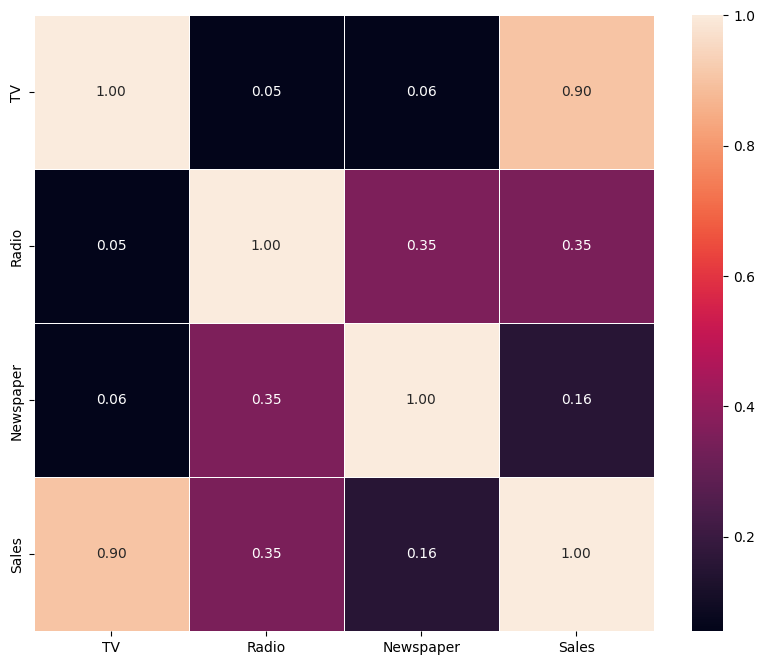

In [32]:
# Câu 9:

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("advertising.csv ")

plt.figure(figsize=(10, 8))
data_corr = data.corr()
sns.heatmap(data_corr, annot=True, fmt=".2f", linewidth=.5)
plt.show()

In [35]:
# Câu 10:

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

vi_data_df = pd.read_csv("./vi_text_retrieval.csv")
context = vi_data_df["text"]
context = [doc.lower() for doc in context]

tfidf_vectorizer = TfidfVectorizer()
context_embedded = tfidf_vectorizer.fit_transform(context)
context_embedded.toarray()[7][0]

np.float64(0.31126580760710637)

In [39]:
# Câu 11:

def tfidf_search ( question , tfidf_vectorizer , top_d =5) :
    # lowercasing before encoding
    question = question.lower()
    query_embedded = tfidf_vectorizer.transform([question])
    cosine_scores = cosine_similarity(query_embedded, context_embedded).flatten()

    # Get top k cosine score and index its
    results = []
    for idx in cosine_scores . argsort () [ - top_d :][:: -1]:
        doc_score = {
        'id': idx ,
        'cosine_score': cosine_scores [ idx ]
        }
        results . append ( doc_score )
    return results

question = vi_data_df . iloc [0]['question']
results = tfidf_search ( question , tfidf_vectorizer , top_d =5)
results [0]['cosine_score']

np.float64(0.6279910475266972)

In [42]:
def corr_search(question, tfidf_vectorizer, top_d=5):
    # lowercasing before encoding
    question = question.lower()
    query_embedded = tfidf_vectorizer.transform([question])
    corr_scores = np.corrcoef(query_embedded.toarray(), context_embedded.toarray())
    corr_scores = corr_scores[0][1:]
    # Get top k correlation score and index its
    results = []
    for idx in corr_scores.argsort()[-top_d:][::-1]:
        doc = {"id": idx, "corr_score": corr_scores[idx]}
        results.append(doc)
    return results


question = vi_data_df.iloc[0]["question"]
results = corr_search(question, tfidf_vectorizer, top_d=5)
results[1]["corr_score"]

np.float64(0.20734246471973253)